In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
results_1 = pd.read_csv("../results/l1_imb_results.csv", index_col=0)
results_2 = pd.read_csv("../results/l2_imb_results.csv", index_col=0)

In [3]:
L1 = results_1[["Seed", "Samples", "L1 SKEL F1", "L1 DAG F1"]]
L1 = L1.rename(columns={"L1 SKEL F1": "SKEL F1", "L1 DAG F1": "DAG F1"})
L1["Score"] = "L1"

L2 = results_2[["Seed", "Samples", "L2 SKEL F1", "L2 DAG F1"]]#
L2 = L2.rename(columns={"L2 SKEL F1": "SKEL F1", "L2 DAG F1": "DAG F1"})
L2["Score"] = "L2"

BIC = results_2[["Seed", "Samples", "BIC SKEL F1", "BIC DAG F1"]]#
BIC = BIC.rename(columns={"BIC SKEL F1": "SKEL F1", "BIC DAG F1": "DAG F1"})
BIC["Score"] = "BIC"

results = BIC.append([L1, L2])

In [4]:
results

,Seed,Samples,SKEL F1,DAG F1,Score
0,0,100,0.000000,0.000000,BIC
1,0,200,0.000000,0.000000,BIC
2,0,400,0.000000,0.000000,BIC
3,0,800,0.000000,0.000000,BIC
4,0,1600,0.000000,0.000000,BIC
...,...,...,...,...,...
55,9,200,0.000000,0.000000,L2
56,9,400,0.000000,0.000000,L2
57,9,800,0.000000,0.000000,L2
58,9,1600,0.000000,0.000000,L2


<AxesSubplot:xlabel='Samples', ylabel='SKEL F1'>

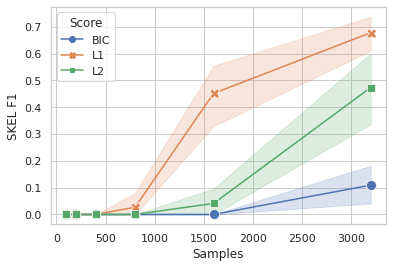

In [5]:
sns.set_theme(style="whitegrid")
sns.lineplot(
    data=results,
    x="Samples", y="SKEL F1", hue="Score", style="Score",
    markers=True, dashes=False,markersize=10
)

<AxesSubplot:xlabel='Samples', ylabel='DAG F1'>

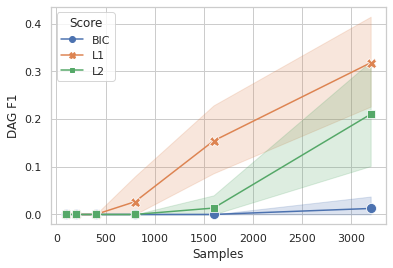

In [6]:
sns.set_theme(style="whitegrid")
sns.lineplot(
    data=results,
    x="Samples", y="DAG F1", hue="Score", style="Score",
    markers=True, dashes=False,markersize=10
)

(0.0, 1.0)

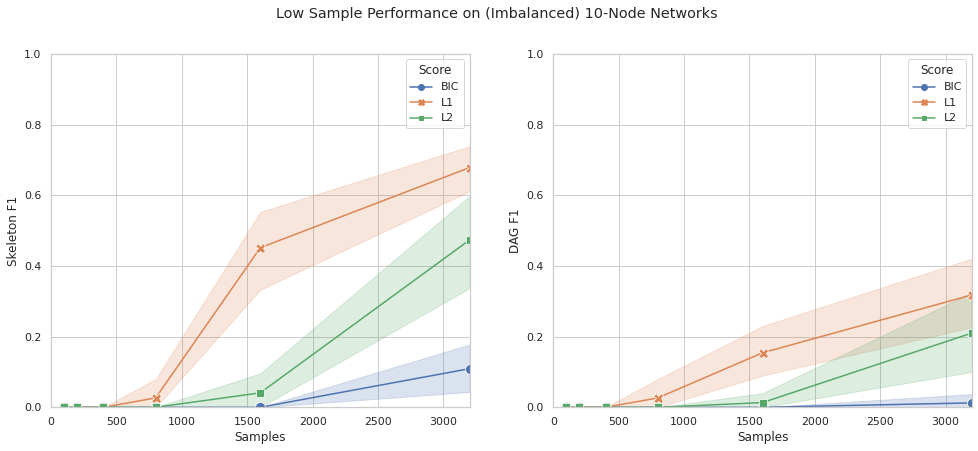

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Low Sample Performance on (Imbalanced) 10-Node Networks')
fig.set_size_inches(16.5, 6.5)
sns.set_theme(style="whitegrid")
sns.lineplot(
    data=results,
    x="Samples", y="SKEL F1", hue="Score", style="Score",
    markers=True, dashes=False,markersize=10,ax=ax1
)

sns.set_theme(style="whitegrid")
sns.lineplot(
    data=results,
    x="Samples", y="DAG F1", hue="Score", style="Score",
    markers=True, dashes=False,markersize=10,ax=ax2
)

ax1.set_ylabel("Skeleton F1")
ax2.set_ylabel("DAG F1")

ax1.set_xlim([0, 3200])
ax2.set_xlim([0, 3200])

ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])
